## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics.pairwise import cosine_similarity

## Plot settings

In [2]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 23
plt.rcParams['figure.titlesize'] = 26
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['figure.figsize'] = 10,7

## Loading data

In [5]:
books_df = pd.read_csv('data/Books.csv')
users_df = pd.read_csv('data/Users.csv')
ratings_df = pd.read_csv('data/Ratings.csv')

/home/pandey/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
dict={'Book-Title':'Title',
     'Book-Author':'Author',
      'Image-URL-M':'URL',
     'Year-Of-Publication':'Publication_Year',
     'Book-Rating':'Rating'}
books_df.rename(columns=dict,inplace=True)
ratings_df.rename(columns=dict,inplace=True)

In [10]:
books_df.drop(['Image-URL-S','Image-URL-L'],axis=1)

,ISBN,Title,Author,Publication_Year,Publisher,URL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...


In [11]:
# Count the number of unique books and users
num_books = len(books_df["ISBN"].unique())
num_users = len(users_df["User-ID"].unique())
print("Number of unique books: ", num_books)
print("Number of unique users: ", num_users)

Number of unique books:  271360
Number of unique users:  278858


In [12]:
print(books_df.shape)
print(ratings_df.shape)
print(users_df.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [13]:
books_df.isnull().sum()

ISBN                0
Title               0
Author              1
Publication_Year    0
Publisher           2
Image-URL-S         0
URL                 0
Image-URL-L         3
dtype: int64

In [14]:
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [15]:
ratings_df.isnull().sum()

User-ID    0
ISBN       0
Rating     0
dtype: int64

In [16]:
books_df.duplicated().sum(),ratings_df.duplicated().sum(),users_df.duplicated().sum()

(0, 0, 0)

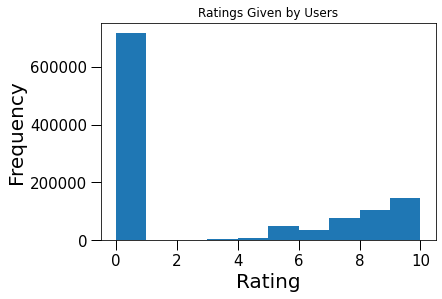

In [17]:
# Ratings distribution
plt.hist(ratings_df["Rating"], bins=10)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Ratings Given by Users")
plt.savefig('Ratings_distribution.png',dpi=300)
plt.show()

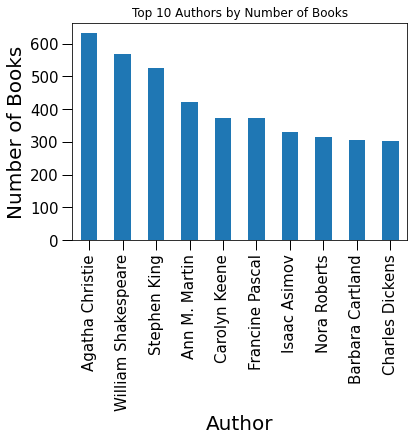

In [18]:
# Authors with the highest number of books
author_counts = books_df["Author"].value_counts()
top_authors = author_counts.head(10)

# Top authors
top_authors.plot(kind='bar')
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.title("Top 10 Authors by Number of Books")
plt.savefig('Top_10_Authors.png',dpi=300)
plt.show()

# Popularity Based Recommender System

In [19]:
ratings_with_name = ratings_df.merge(books_df,on='ISBN')

In [20]:
num_rating_df = ratings_with_name.groupby('Title').count()['Rating'].reset_index()
num_rating_df.rename(columns={'Rating':'Num_Ratings'},inplace=True)
num_rating_df

,Title,Num_Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [21]:
avg_rating_df = ratings_with_name.groupby('Title').mean()['Rating'].reset_index()
avg_rating_df.rename(columns={'Rating':'Avg_Rating'},inplace=True)
avg_rating_df.head()

,Title,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [22]:
popular_df = num_rating_df.merge(avg_rating_df,on='Title')
popular_df.head()

,Title,Num_Ratings,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [23]:
popular_df = popular_df[popular_df['Num_Ratings']>=250].sort_values('Avg_Rating',ascending=False).head(50)

In [24]:
popular_df = popular_df.merge(books_df,on='Title').drop_duplicates('Title')[['Title','Author','URL','Num_Ratings','Avg_Rating','Publication_Year','Publisher']]


In [25]:
popular_df['Title'][0]

'Harry Potter and the Prisoner of Azkaban (Book 3)'

# Collaborative Filtering Based Recommender System

In [26]:
# Filtering users with at least 25 ratings
x = ratings_with_name.groupby('User-ID').count()['Rating'] > 25
filtered_users = x[x].index

In [27]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(filtered_users)]

In [28]:
# Filtering books with at least 50 ratings
y = filtered_rating.groupby('Title').count()['Rating']>=50
famous_books = y[y].index

In [29]:
final_ratings = filtered_rating[filtered_rating['Title'].isin(famous_books)]

In [30]:
pt = final_ratings.pivot_table(index='Title',columns='User-ID',values='Rating') # Creating a pivot table with books as rows and users as columns and replace NaN values with 0

In [31]:
pt.fillna(0,inplace=True)

In [32]:
pt

User-ID,242,243,254,383,446,487,503,507,638,643,...,278188,278194,278202,278221,278356,278418,278535,278582,278633,278843
Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
similarity_scores = cosine_similarity(pt) # Calculate cosine similarity
similarity_scores.shape

(1638, 1638)

In [34]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    # Get the details of the similar books
    data = []
    for i in similar_items:
        item = []
        temp_df = books_df[books_df['Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Title')['Title'].values))
        item.extend(list(temp_df.drop_duplicates('Title')['Author'].values))
        item.extend(list(temp_df.drop_duplicates('Title')['URL'].values))
        item.extend(list(temp_df.drop_duplicates('Title')['Publication_Year'].values))
        item.extend(list(temp_df.drop_duplicates('Title')['Publisher'].values))
        data.append(item)  
    return data

In [35]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg',
  2004,
  'Signet'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg',
  1989,
  'Harpercollins'],
 ['American Psycho (Vintage Contemporaries)',
  'Bret Easton Ellis',
  'http://images.amazon.com/images/P/0679735771.01.MZZZZZZZ.jpg',
  2000,
  'Vintage Books USA'],
 ["The Hitchhiker's Guide to the Galaxy",
  'Douglas Adams',
  'http://images.amazon.com/images/P/0671461494.01.MZZZZZZZ.jpg',
  1982,
  'Pocket']]

In [36]:
books_df.drop_duplicates('Title',inplace=True) # Removing duplicate books based on title

## Saving the dataframes to pickle files for later use

In [37]:
pickle.dump(popular_df,open('popular.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books_df,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))